In [1]:
import matplotlib.pylab as plt
import numpy as np
import os


In [2]:
import pandas as pd

In [3]:
# 
RootDir="/home/binsun/plotfigures/CaMInterplay"

In [4]:
linkerCase=['WTLinker','FlexLinker','RigidLinker']
CaConc = ['0Ca','2Ca']

In [5]:
def readWisp(linker,Ca,Subdir="WISP",Target="Notarget"):
    """
    the optimal and suboptimal paths 
    between residues 70 and 85
    """
    
    datadir = os.path.join(RootDir,Subdir,Target)

    file = os.path.join(datadir,linker,Ca,"simply_formatted_paths.txt")
    t = pd.read_csv(file, header=None, delim_whitespace=True,names=list(range(20)))
    #t = np.loadtxt(file,comments="#")
        
    return t

In [6]:
# all cases
Cambr = ["Notarget","WithTarget"]
Linker = ["WTLinker","FlexLinker", "RigidLinker"]
FreeCa = ["0Ca","2Ca"]


In [7]:
# define dict to store data
WISPdata = {i:{} for i in Cambr}
WISPdata = {i:{} for i in Cambr}

for i in Cambr:
    for j in Linker:
        WISPdata[i][j] = {}
        WISPdata[i][j] = {}
    


In [8]:
for i in Cambr:
    for j in Linker:
        for z in FreeCa:
            WISPdata[i][j][z] = readWisp(j,z,Target=i)


In [9]:
binx,Num = np.histogram(WISPdata['Notarget']['WTLinker']['0Ca'][0])

In [10]:
colors = {
    "WTLinker":"black",
    "FlexLinker":"blue",
    "RigidLinker":"red",
}

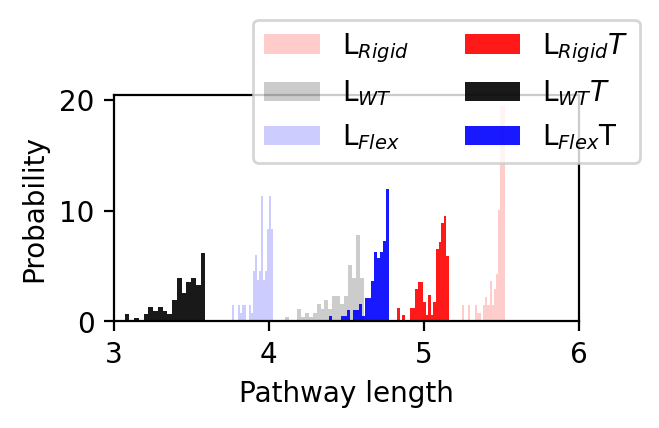

In [105]:
labels=['L$_{Rigid}$','L$_{WT}$','L$_{Flex}$','L$_{Rigid}T$','L$_{WT}T$','L$_{Flex}$T']
k = 0
idx = -1
plt.figure(figsize=(3,1.5),dpi=200)
for z in ['0Ca']:
    k += 1
    plt.subplot(1,1,k)
    #plt.title('0 free Ca')
    for i in Cambr:
        if i == 'Notarget':
            alpha=0.2
        else:
            alpha=0.9
        for j in ['RigidLinker','WTLinker','FlexLinker']:
            idx += 1
            
            plt.hist(WISPdata[i][j][z][0],bins=20,color=colors[j],alpha=alpha,density=True,stacked=True,\
                    label=labels[idx])
            plt.xlim(3,6)
            plt.legend(fontsize=10,loc=(0.3,0.7),ncol=2)
            plt.xlabel('Pathway length')
            plt.ylabel('Probability')
plt.savefig('1.png')

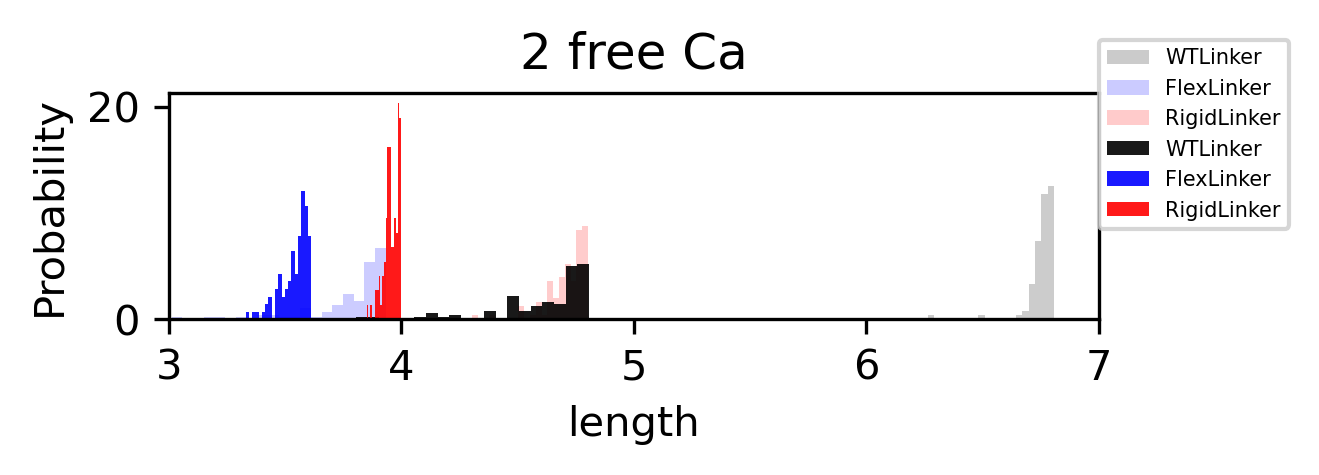

In [96]:
k = 0
plt.figure(figsize=(4,1),dpi=300)
for z in ['2Ca']:
    k += 1
    plt.subplot(1,1,k)
    plt.title('2 free Ca')
    for i in Cambr:
        if i == 'Notarget':
            alpha=0.2
        else:
            alpha=0.9
        for j in Linker:
            plt.hist(WISPdata[i][j][z][0],bins=20,color=colors[j],alpha=alpha,density=True,stacked=True,\
                    label=j)
            plt.xlim(3,7)
            plt.legend(fontsize=5,loc=(1,0.4))
            plt.xlabel('length')
            plt.ylabel('Probability')

In [19]:
colors = {
    "WTLinker":"black",
    "FlexLinker":"blue",
    "RigidLinker":"red",
}

In [98]:
# Now analyze the node degeneracy

In [20]:
def countNodeDegen(data):
    """
    Count the residue degeneracy in the pathways
    """
    tt = data.to_numpy()
    unique, counts = np.unique(tt[:,1:],return_counts=True)
    ncounts = dict(zip(unique,counts))
    
    newdic = {}
    for i in ncounts.keys():
        if not np.isnan(i):
            newdic[i] = ncounts[i]
    
    i,j = zip(*newdic.items())
    return [list(i),list(j)]

In [21]:
# define dict to store denegeracy data
DGEdata = {i:{} for i in Cambr}
DGEdata = {i:{} for i in Cambr}

for i in Cambr:
    for j in Linker:
        DGEdata[i][j] = {}
        DGEdata[i][j] = {}

In [22]:
for i in Cambr:
    for j in Linker:
        for z in FreeCa:
            DGEdata[i][j][z] = countNodeDegen(WISPdata[i][j][z])


In [23]:
alphas = dict(zip(Linker,(0.7,0.8,0.8)))
offset = dict(zip(Linker,(60.0,60.25,60.5)))

In [24]:
colors = {
    "WTLinker":"black",
    "FlexLinker":"blue",
    "RigidLinker":"red",
}

In [25]:
print (type(offset['WTLinker']))

<class 'float'>


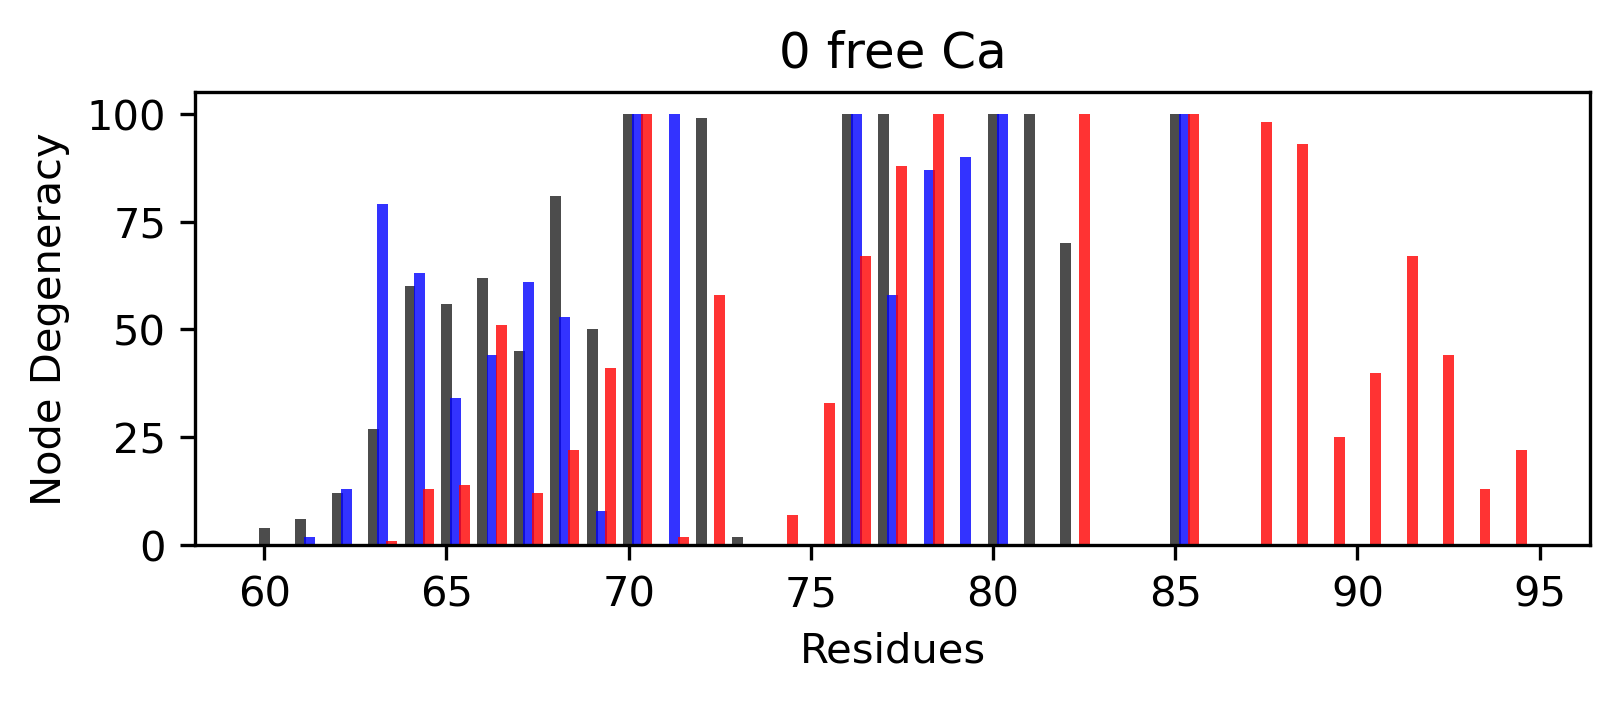

In [26]:
k = 0
plt.figure(figsize=(6,2),dpi=300)
for z in ['0Ca']:
    k += 1
    plt.subplot(1,1,k)
    plt.title('0 free Ca')
    for i in ['Notarget']:
        for j in Linker:
            
            plt.bar(np.asarray(DGEdata[i][j][z][0])+offset[j],DGEdata[i][j][z][1],color=colors[j],\
                    alpha=alphas[j],width=0.3)
                    #bins=20,color=colors[j],alpha=alpha,density=True,stacked=True,\
                    #label=j)
            #plt.xlim(3,7)
            #plt.legend(fontsize=5,loc=(1,0.4))
            plt.xlabel('Residues')
            plt.ylabel('Node Degeneracy')

In [27]:
print (DGEdata['Notarget']['WTLinker']['0Ca'])

[[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 13.0, 16.0, 17.0, 20.0, 21.0, 22.0, 25.0], [4, 6, 12, 27, 60, 56, 62, 45, 81, 50, 100, 99, 2, 100, 100, 100, 100, 70, 100]]


In [28]:
print (DGEdata['WithTarget']['WTLinker']['0Ca'])

[[5.0, 6.0, 7.0, 9.0, 10.0, 11.0, 12.0, 13.0, 15.0, 16.0, 17.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0], [1, 9, 6, 16, 100, 23, 13, 54, 13, 100, 11, 20, 94, 47, 43, 35, 100, 24, 10, 2, 1]]


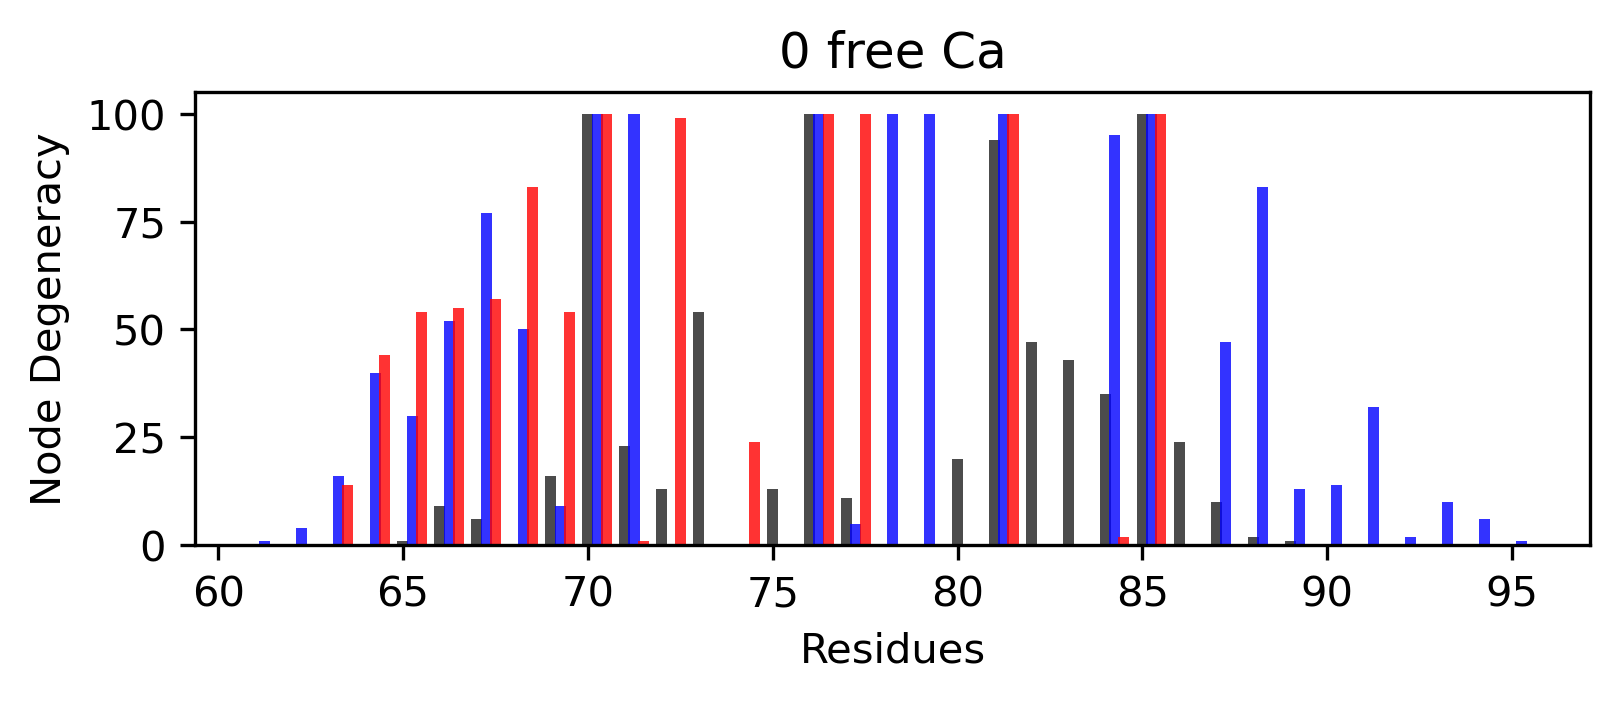

In [29]:
k = 0
plt.figure(figsize=(6,2),dpi=300)
for z in ['0Ca']:
    k += 1
    plt.subplot(1,1,k)
    plt.title('0 free Ca')
    for i in ['WithTarget']:
        for j in Linker:
            
            plt.bar(np.asarray(DGEdata[i][j][z][0])+offset[j],DGEdata[i][j][z][1],color=colors[j],\
                    alpha=alphas[j],width=0.3)
                    #bins=20,color=colors[j],alpha=alpha,density=True,stacked=True,\
                    #label=j)
            #plt.xlim(3,7)
            #plt.legend(fontsize=5,loc=(1,0.4))
            plt.xlabel('Residues')
            plt.ylabel('Node Degeneracy')

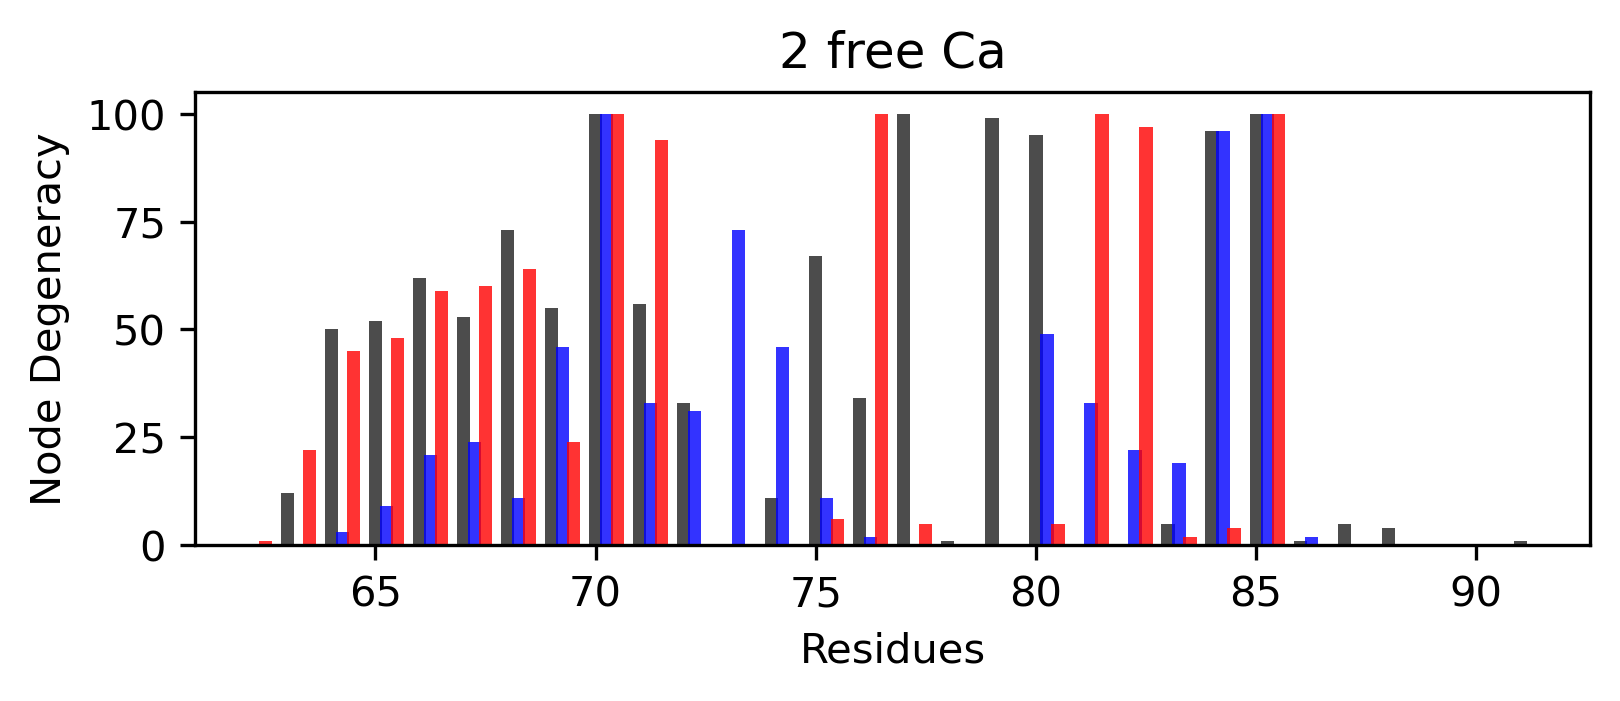

In [30]:
k = 0
plt.figure(figsize=(6,2),dpi=300)
for z in ['2Ca']:
    k += 1
    plt.subplot(1,1,k)
    plt.title('2 free Ca')
    for i in ['Notarget']:
        for j in Linker:
            
            plt.bar(np.asarray(DGEdata[i][j][z][0])+offset[j],DGEdata[i][j][z][1],color=colors[j],\
                    alpha=alphas[j],width=0.3)
                    #bins=20,color=colors[j],alpha=alpha,density=True,stacked=True,\
                    #label=j)
            #plt.xlim(3,7)
            #plt.legend(fontsize=5,loc=(1,0.4))
            plt.xlabel('Residues')
            plt.ylabel('Node Degeneracy')

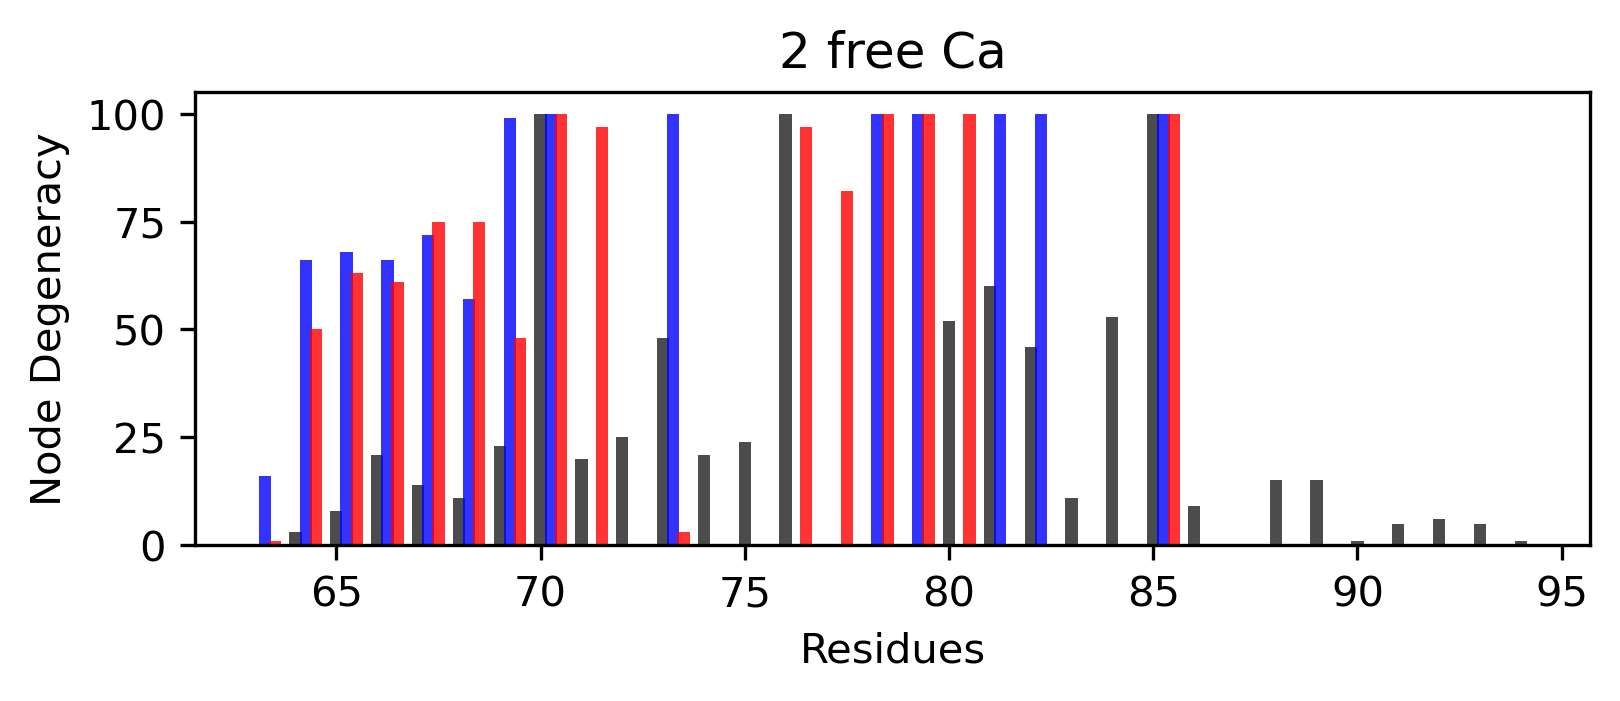

In [31]:
k = 0
plt.figure(figsize=(6,2),dpi=300)
for z in ['2Ca']:
    k += 1
    plt.subplot(1,1,k)
    plt.title('2 free Ca')
    for i in ['WithTarget']:
        for j in Linker:
            
            plt.bar(np.asarray(DGEdata[i][j][z][0])+offset[j],DGEdata[i][j][z][1],color=colors[j],\
                    alpha=alphas[j],width=0.3)
                    #bins=20,color=colors[j],alpha=alpha,density=True,stacked=True,\
                    #label=j)
            #plt.xlim(3,7)
            #plt.legend(fontsize=5,loc=(1,0.4))
            plt.xlabel('Residues')
            plt.ylabel('Node Degeneracy')

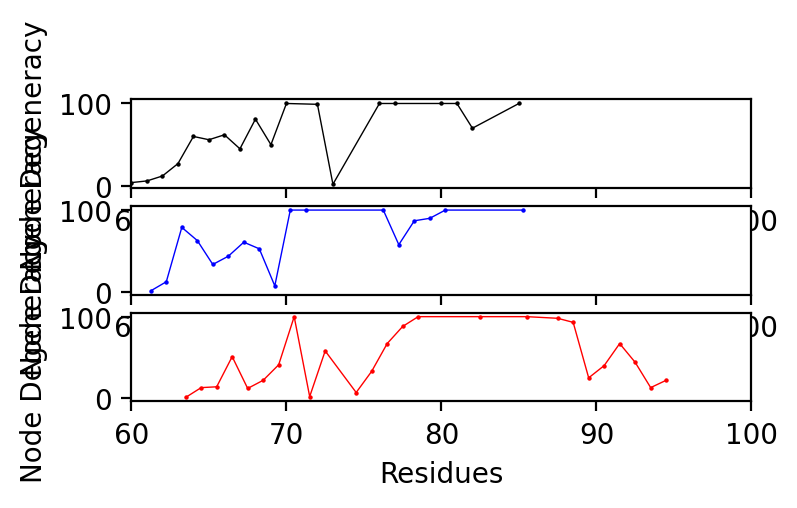

In [49]:
k = 0
plt.figure(figsize=(4,2),dpi=200)
for z in ['0Ca']:
  
    plt.title('0 free Ca')
    for i in ['Notarget']:
        for j in Linker:
            k += 1
            
            plt.subplot(3,1,k)
            plt.plot(np.asarray(DGEdata[i][j][z][0])+offset[j],DGEdata[i][j][z][1],'o-',color=colors[j],\
                    lw=0.5,markersize=0.6)
                    #bins=20,color=colors[j],alpha=alpha,density=True,stacked=True,\
                    #label=j)
            plt.xlim(60,100)
            #plt.legend(fontsize=5,loc=(1,0.4))
            plt.xlabel('Residues')
            plt.ylabel('Node Degeneracy')

In [50]:
print (DGEdata['Notarget']['WTLinker']['0Ca'][1])

[4, 6, 12, 27, 60, 56, 62, 45, 81, 50, 100, 99, 2, 100, 100, 100, 100, 70, 100]


In [51]:
print (DGEdata['Notarget']['WTLinker']['0Ca'][0])

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 13.0, 16.0, 17.0, 20.0, 21.0, 22.0, 25.0]


In [53]:
len(DGEdata['Notarget']['WTLinker']['0Ca'][0])

19

In [60]:
def addmissingresidue(data):
    """
    For some resideus that have zero degeneracy, add the this data point explicitly
    """
    newdata=np.zeros(40)
    for i in np.arange(40):
        if i in data[0]:
            idx = data[0].index(i)
            newdata[i] = data[1][idx]
        else: 
            newdata[i]=0.0
    return newdata

        

In [61]:
Lwt0Ca = addmissingresidue(DGEdata['Notarget']['WTLinker']['0Ca'])
LwtT0Ca = addmissingresidue(DGEdata['WithTarget']['WTLinker']['0Ca'])
Lrigid0Ca = addmissingresidue(DGEdata['Notarget']['RigidLinker']['0Ca'])
LrigidT0Ca = addmissingresidue(DGEdata['WithTarget']['RigidLinker']['0Ca'])
Lflex0Ca = addmissingresidue(DGEdata['Notarget']['FlexLinker']['0Ca'])
LflexT0Ca = addmissingresidue(DGEdata['WithTarget']['FlexLinker']['0Ca'])

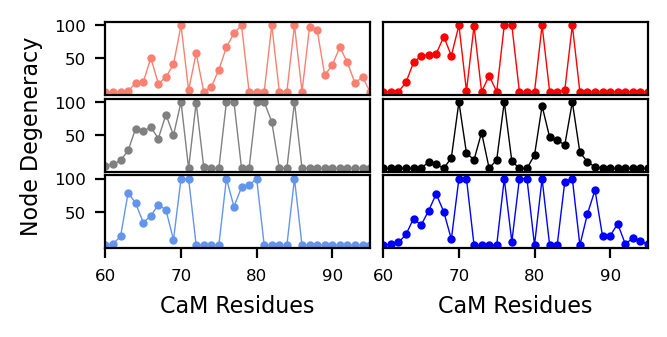

In [107]:
k = 0
plt.figure(figsize=(3.5,1.5),dpi=200)
plt.subplot(3,2,1)
plt.plot(np.arange(60,100),Lrigid0Ca,'o-',color='salmon',\
lw=0.5,markersize=2)
plt.xlim([60,95])
plt.xticks([])
plt.yticks([50,100],[50,100],fontsize=6)

    
plt.subplot(3,2,2)
plt.plot(np.arange(60,100),LrigidT0Ca,'o-',color='red',\
lw=0.5,markersize=2)
plt.xlim([60,95])
plt.yticks([])
plt.xticks([])


plt.subplot(3,2,3)
plt.plot(np.arange(60,100),Lwt0Ca,'o-',color='gray',\
lw=0.5,markersize=2)
plt.xlim([60,95])
plt.xticks([])
plt.yticks([50,100],[50,100],fontsize=6)
plt.ylabel('Node Degeneracy',fontsize=8)

plt.subplot(3,2,4)
plt.plot(np.arange(60,100),LwtT0Ca,'o-',color='black',\
lw=0.5,markersize=2)
plt.xlim([60,95])
plt.yticks([])
plt.xticks([])

plt.subplot(3,2,5)
plt.plot(np.arange(60,100),Lflex0Ca,'o-',color='cornflowerblue',\
lw=0.5,markersize=2)
plt.xlim([60,95])
plt.xlabel('CaM Residues',fontsize=8)
plt.yticks([50,100],[50,100],fontsize=6)
plt.xticks(np.arange(60,100,10),np.arange(60,100,10),fontsize=6)


plt.subplot(3,2,6)
plt.plot(np.arange(60,100),LflexT0Ca,'o-',color='blue',\
lw=0.5,markersize=2)
plt.yticks([])
plt.xticks(np.arange(60,100,10),np.arange(60,100,10),fontsize=6)

plt.xlim([60,95])
            #plt.legend(fontsize=5,loc=(1,0.4))
plt.xlabel('CaM Residues',fontsize=8)
#plt.ylabel('Node Degeneracy')
plt.subplots_adjust(wspace=0.05,hspace=0.05)
